<a href="https://colab.research.google.com/github/ferdinand-lanvino/dcd-ml-beginner/blob/master/dcd_ml_beginner_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Preparation

In [1]:
# Clone commodity-predictor repo.
!git clone -l -s git://github.com/ferdinand-lanvino/dcd-ml-beginner.git
%cd dcd-ml-beginner
!ls

Cloning into 'dcd-ml-beginner'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 2245 (delta 22), reused 25 (delta 8), pack-reused 2198
Receiving objects: 100% (2245/2245), 152.99 MiB | 36.63 MiB/s, done.
Resolving deltas: 100% (22/22), done.
Checking out files: 100% (2200/2200), done.
/content/dcd-ml-beginner
 diabetes.csv	      Modul_1.ipynb	   'Modul 4.ipynb'
 Iris.csv	      Modul_2.ipynb	    rockpaperscissors
 iris_tree.dot	      Modul_3_ipnyb.ipynb   Salary_Data.csv
 Mall_Customers.csv  'Modul 3.ipynb'	    Social_Network_Ads.csv


In [2]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [3]:
os.listdir('rockpaperscissors')

['scissors', 'paper', 'README_rpc-cv-images.txt', 'rock']

In [4]:
print("Total Dataset Rock:", len(os.listdir('rockpaperscissors/rock')))
print("Total Dataset Paper:", len(os.listdir('rockpaperscissors/paper')))
print("Total Dataset Scissors:", len(os.listdir('rockpaperscissors/scissors')))

Total Dataset Rock: 726
Total Dataset Paper: 712
Total Dataset Scissors: 750


In [5]:
#Set base direktori
base_dir = 'rockpaperscissors'
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

#Buat direktori untuk data train & validasi
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

#Set direktori untuk masing-masing rock, paper, scissors pada direktori data train
rock_train_dir = os.path.join(train_dir, 'rock')
paper_train_dir = os.path.join(train_dir, 'paper')
scissors_train_dir = os.path.join(train_dir, 'scissors')

#Set direktori untuk masing-masing rock, paper, scissors pada direktori data validasi
rock_val_dir = os.path.join(val_dir, 'rock')
paper_val_dir = os.path.join(val_dir, 'paper')
scissors_val_dir = os.path.join(val_dir, 'scissors')

#Buat direktori train dan validasi
if not os.path.exists(train_dir):
  os.mkdir(train_dir)
if not os.path.exists(val_dir):
  os.mkdir(val_dir)

#Buat direktori untuk masing-masing rock, paper, scissors pada direktori data validasi
if not os.path.exists(rock_train_dir):
  os.mkdir(rock_train_dir)
if not os.path.exists(paper_train_dir):
  os.mkdir(paper_train_dir)
if not os.path.exists(scissors_train_dir):
  os.mkdir(scissors_train_dir)

#Buat direktori untuk masing-masing rock, paper, scissors pada direktori data validasi
if not os.path.exists(rock_val_dir):
  os.mkdir(rock_val_dir)
if not os.path.exists(paper_val_dir):
  os.mkdir(paper_val_dir)
if not os.path.exists(scissors_val_dir):
  os.mkdir(scissors_val_dir)

Train Test Split

In [6]:
rock_train, rock_val = train_test_split(os.listdir(rock_dir), test_size = 0.4)
paper_train, paper_val = train_test_split(os.listdir(paper_dir), test_size = 0.4)
scissors_train, scissors_val = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

print("Jumlah Data Train Rock",len(rock_train), 'dan Validation Rock',len(rock_val))
print("Jumlah Data Train Paper",len(paper_train), 'dan Validation Paper',len(paper_val))
print("Jumlah Data Train Scissors",len(scissors_train), 'dan Validation Scissors',len(scissors_val))

Jumlah Data Train Rock 435 dan Validation Rock 291
Jumlah Data Train Paper 427 dan Validation Paper 285
Jumlah Data Train Scissors 450 dan Validation Scissors 300


In [7]:
#Untuk mengosongkan isi folder files train & test
def hapus_files(folder):
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

hapus_files('/content/dcd-ml-beginner/rockpaperscissors/train/rock')
hapus_files('/content/dcd-ml-beginner/rockpaperscissors/train/paper')
hapus_files('/content/dcd-ml-beginner/rockpaperscissors/train/scissors')

hapus_files('/content/dcd-ml-beginner/rockpaperscissors/val/rock')
hapus_files('/content/dcd-ml-beginner/rockpaperscissors/val/paper')
hapus_files('/content/dcd-ml-beginner/rockpaperscissors/val/scissors')


for i in rock_train:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(rock_train_dir, i))
for i in rock_val:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(rock_val_dir, i))

for i in paper_train:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(paper_train_dir, i))
for i in paper_val:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(paper_val_dir, i))

for i in scissors_train:
  shutil.copy(os.path.join(scissors_dir, i), os.path.join(scissors_train_dir, i))
for i in scissors_val:
  shutil.copy(os.path.join(scissors_dir, i), os.path.join(scissors_val_dir, i))

In [8]:
print(len(os.listdir(rock_train_dir)))
print(len(os.listdir(rock_val_dir)))

print(len(os.listdir(paper_train_dir)))
print(len(os.listdir(paper_val_dir)))

print(len(os.listdir(scissors_train_dir)))
print(len(os.listdir(scissors_val_dir)))



435
291
427
285
450
300


In [9]:
# membuat image data generator

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [31]:
# membuat model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [32]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.SGD(),
              metrics=['accuracy'])

In [33]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 42s - loss: 1.0954 - accuracy: 0.3887 - val_loss: 1.0892 - val_accuracy: 0.3688
Epoch 2/20
25/25 - 42s - loss: 1.0847 - accuracy: 0.4688 - val_loss: 1.0741 - val_accuracy: 0.4313
Epoch 3/20
25/25 - 42s - loss: 1.0704 - accuracy: 0.4425 - val_loss: 1.0626 - val_accuracy: 0.5938
Epoch 4/20
25/25 - 42s - loss: 1.0530 - accuracy: 0.5100 - val_loss: 1.0430 - val_accuracy: 0.6687
Epoch 5/20
25/25 - 42s - loss: 1.0141 - accuracy: 0.6450 - val_loss: 0.9845 - val_accuracy: 0.7375
Epoch 6/20
25/25 - 42s - loss: 0.9387 - accuracy: 0.6375 - val_loss: 0.9321 - val_accuracy: 0.5375
Epoch 7/20
25/25 - 42s - loss: 0.8238 - accuracy: 0.6875 - val_loss: 1.0954 - val_accuracy: 0.3562
Epoch 8/20
25/25 - 42s - loss: 0.7602 - accuracy: 0.7237 - val_loss: 0.6113 - val_accuracy: 0.7812
Epoch 9/20
25/25 - 42s - loss: 0.6689 - accuracy: 0.7262 - val_loss: 0.6573 - val_accuracy: 0.7437
Epoch 10/20
25/25 - 42s - loss: 0.6154 - accuracy: 0.7675 - val_loss: 0.5493 - val_accuracy: 0.8125
Epoch 11/

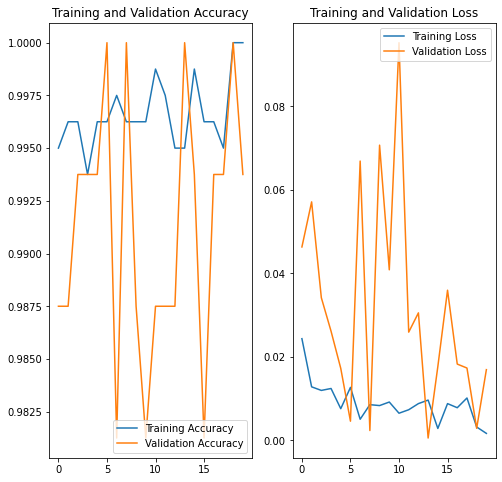

In [22]:
# visualisasi hasil data training (Plot accuracy & loss model)

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving 6weMqPPWdXLD7lNy.png to 6weMqPPWdXLD7lNy.png
6weMqPPWdXLD7lNy.png
scissors


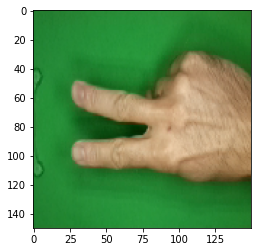

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')